# Mathematics and Statistics

Given 5 points $(x_0,y_0), (x_1,y_1), (x_2,y_2), (x_3,y_3), (x_4,y_4)$, for disjoint $x_i$, can you find a polynomial of degree 4 which contains each of these points?

Our polynomial will be of the form
$P(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + a_4 x^4 $, 

and for this to pass through all 5 points we need:
$P(x_i) = y_i$ for $i \in \{0,1,2,3,4\}$

This is equivalent to:

$
\begin{pmatrix} 1 & x_0 & x_0^2 & x_0^3 & x_0^4 \\ 1 & x_1 & x_1^2 & x_1^3 & x_1^4 \\ 1 & x_2 & x_2^2 & x_2^3 & x_2^4 \\ 1 & x_3 & x_3^2 & x_3^3 & x_3^4 \\ 1 & x_4 & x_4^2 & x_4^3 & x_4^4 \\ \end{pmatrix} \begin{pmatrix} a_0 \\ a_1 \\ a_2 \\ a_3 \\ a_4 \\ \end{pmatrix} = \begin{pmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \\ y_4 \\  \end{pmatrix} $

We need to find the $a_i$!

First of all, use a user input to collect five $(x,y)$ coordinates, write each coordinate as a list of two elements. 

The only thing needed to be added to the following code block is the coordinate variable, a user input of two values separated by a comma, e.g. 1,2 - $(x,y)$

The code block will repeat this 5 times (because of "for i in range(5):") and will create a list of these coordinates stored as lists themselves (a list of lists)!

In [1]:
coordinates = []
for i in range(5):
    # Do this: Remeber to choose disjoint x values when inputting after running this cell
    coordinate = input('Enter one coordinate: ')
    #
    coordinates.append([float(i) for i in coordinate.split(',')])

Enter one coordinate: 1,2
Enter one coordinate: 2,3
Enter one coordinate: 3,6
Enter one coordinate: 4,0
Enter one coordinate: 5,-4


Use the empty cell below to visualise the new coordinates variable

In [2]:
coordinates

[[1.0, 2.0], [2.0, 3.0], [3.0, 6.0], [4.0, 0.0], [5.0, -4.0]]

The following code block is simply a function that receives the coordinates as an input and outputs the coefficients of the quartic polynomial intersecting these points, you don't need to fill any of it in.

In [3]:
import numpy as np

def solve_a_i(X0, X1, X2, X3, X4):
    
    # Matrix on LHS above
    A = np.array([[1, X0[0], X0[0]**2, X0[0]**3, X0[0]**4],
                  [1, X1[0], X1[0]**2, X1[0]**3, X1[0]**4], 
                  [1, X2[0], X2[0]**2, X2[0]**3, X2[0]**4], 
                  [1, X3[0], X3[0]**2, X3[0]**3, X3[0]**4], 
                  [1, X4[0], X4[0]**2, X4[0]**3, X4[0]**4]])
    
    # Vector on RHS above
    B = np.array([X0[1],X1[1],X2[1],X3[1],X4[1]])
    
    # Solving the matrix equation above
    coefficients = np.linalg.solve(A,B)
    
    return coefficients[::-1] # Reversed order to have the x^4 coefficient first and so on...

The following code block is a function that takes the inputted coordinates and outputs the plot of the polynomial through the coordinates.

Please fill in the values minx, maxx, miny and maxy, which are the minimum value of the $x$-coordinates, the maximum value of the $x$-coordinates, the minimum value of the $y$-coordinates and the maximum value of the $y$-coordinates respectively.

In [4]:
import matplotlib.pyplot as plt

def interpolate(coordinates):
    
    # Do this:
    minx = min(coordinates[0][0], coordinates[1][0], coordinates[2][0], coordinates[3][0],
               coordinates[4][0])
    maxx = max(coordinates[0][0], coordinates[1][0], coordinates[2][0], coordinates[3][0],
               coordinates[4][0])
    miny = min(coordinates[0][1], coordinates[1][1], coordinates[2][1], coordinates[3][1],
               coordinates[4][1])
    maxy = max(coordinates[0][1], coordinates[1][1], coordinates[2][1], coordinates[3][1],
               coordinates[4][1])
    #
    
    # The following plots the inputted points as red dots
    plt.plot([coordinates[0][0], coordinates[1][0], coordinates[2][0], coordinates[3][0],
               coordinates[4][0]],
             [coordinates[0][1], coordinates[1][1], coordinates[2][1], coordinates[3][1],
               coordinates[4][1]], 'ro')
    
    # Creating an x range to plot our function over
    x = np.arange(minx, maxx, (maxx-minx)/10000)
    
    # Finding the quartic polynomial
    coefficients = solve_a_i(coordinates[0], coordinates[1], coordinates[2], coordinates[3],
                             coordinates[4])
   
    # Plotting the polynomial
    plt.plot(x, np.polyval(coefficients,x))
    
    # Setting the ranges for the axis
    plt.axis([minx-0.2*(maxx-minx), maxx+0.2*(maxx-minx), 
              miny - 0.2*(maxy-miny), maxy + 0.2*(maxy-miny)])
    
    plt.show()

The following cell runs the function on our inputted coordinates

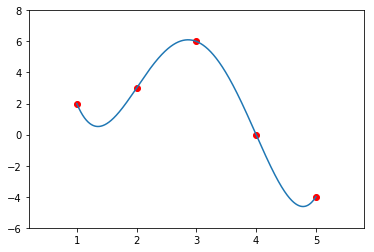

In [5]:
interpolate(coordinates)

Now let's move onto to something quite similar, linear regression!

Linear Regression

Given a set of n 2D points $(x_1,y_1), (x_2,y_2), \dots, (x_n,y_n)$, find the line $\hat{y}(x) = b_0 + b_1x$ that minimises the squared distance between the predicted and actual values, $\hat{y}(x_i)$ and $y(x_i)$ repsectively. 

The squared distance is given by $\sum_{i=1}^{n} (\hat{y}(x_i) - y(x_i))^2$

Using basic calculus and algebra we get the following equations for $b_0$ and $b_1$:

\begin{align*}
b_0 = \frac{(\sum_{i=1}^{n}y_i)(\sum_{i=1}^{n}x_i^2) - (\sum_{i=1}^{n}x_i)(\sum_{i=1}^{n}x_iy_i)}{n\sum_{i=1}^{n}x_i^2 - (\sum_{i=1}^{n}x_i)^2}
\end{align*}

\begin{align*}
b_1 = \frac{n\sum_{i=1}^{n}x_iy_i - (\sum_{i=1}^{n}x_i)(\sum_{i=1}^{n}y_i)}{n\sum_{i=1}^{n}x_i^2 - (\sum_{i=1}^{n}x_i)^2}
\end{align*}

The following function takes an input of the $x$-coordinates and $y$-coordinates as lists separately, and outputs a plot of the 'line of best fit', while also showing the chosen points.

Please fill out the values of sumx (the sum of x coordinates), sumy (the sum of y coordinates), b0 and b1 (as shown above), minx, maxx, miny, maxy,  which are the minimum value of the $x$-coordinates, the maximum value of the $x$-coordinates, the minimum value of the $y$-coordinates and the maximum value of the $y$-coordinates respectively.

In [6]:
# Package used in generating x-coordinates of the plot
import numpy as np
# Package used for plotting
import matplotlib.pyplot as plt

def linear_regression(X,Y):
    n = len(X)
    
    # Do this:
    sumx = sum(X)
    sumy = sum(Y)
    #
    sumx2 = sum([point**2 for point in X])
    sumxy = np.dot(X, Y)
    
    # Do this:
    b0 = (sumx2*sumy - sumx*sumxy) / (n*sumx2 - sumx**2)
    b1 = (n*sumxy - sumx*sumy) / (n*sumx2 - sumx**2)
    #
    
    # Plotting our inputted points
    plt.plot([X],[Y], 'ro')
    
    maxx = max(X)
    minx = min(X)
    maxy = max(Y)
    miny = min(Y)
    
    # Plotting the line of best fit
    x = np.arange(minx, maxx, (maxx-minx)/10000)
    plt.plot(x, np.polyval([b1,b0],x))
    
    plt.axis([minx-0.1*(maxx-minx), maxx+0.1*(maxx-minx), 
              miny - 0.1*(maxy-miny), maxy + 0.1*(maxy-miny)])

Now run this function (like we did above) with $x$-coordinates e.g. [1,2,3,4,5,6,7,8] and $y$-coordinates.

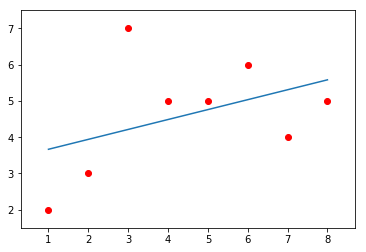

In [7]:
linear_regression([1,2,3,4,5,6,7,8], [2,3,7,5,5,6,4,5])